In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
results = pd.read_csv('times.csv')
results

,size,type,cores,time
0,1,m5a.x,1,48.344
1,1,m5a.x,1,48.667
2,1,m5a.x,1,49.647
3,1,m5a.x,28,118.921
4,1,m5a.x,28,120.055
5,1,m5a.x,28,122.053
6,5,m5a.x,1,237.016
7,5,m5a.x,1,234.976
8,5,m5a.x,1,232.856
9,5,m5a.x,28,548.337


In [3]:
sizes = results['size'].unique()
types = results['type'].unique()
cores = results['cores'].unique()

means = pd.DataFrame(columns=['size', 'type', 'cores','mean','std'])

i = 0

for size in sizes:

    size_results = results[ results['size'] == size]
    
    for type in types:
        size_thread = size_results[ size_results['type'] == type]
        
        for core in cores:
            size_type_core = size_thread[ size_thread['cores'] == core] 
            means.loc[i] = [size, type, core, size_type_core['time'].mean(), size_type_core['time'].std()]
            i += 1

In [4]:
means

,size,type,cores,mean,std
0,1,m5a.x,1,48.886000,0.678545
1,1,m5a.x,28,120.343000,1.585738
2,5,m5a.x,1,234.949333,2.080128
3,5,m5a.x,28,531.389667,14.677841
4,10,m5a.x,1,470.025000,0.687308
5,10,m5a.x,28,1080.656000,10.224764


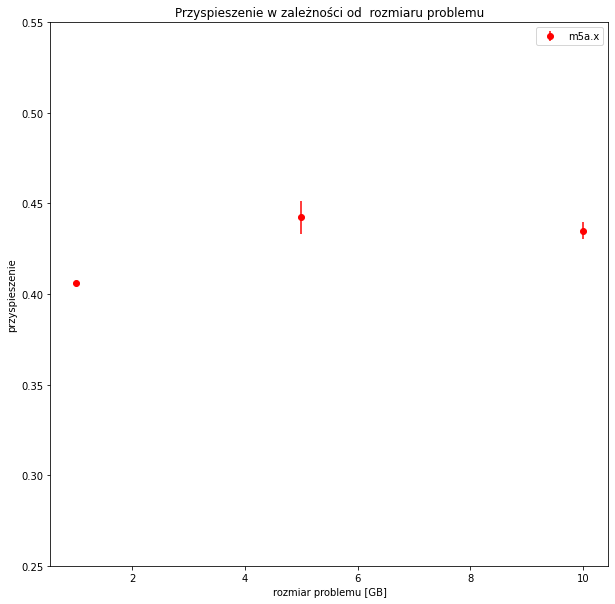

In [47]:

for type, c in zip(types, ['red', 'green']):
    plt.figure(figsize=(10,10))

    type_res = results[ results['type'] == type]

    speedup = pd.DataFrame(columns=['size', 'type','speedup'])
    i = 0

    type_res_1 = type_res[ type_res['cores'] == 1]
    type_res_28 = type_res[ type_res['cores'] == 28]

    for size, a, b in zip(type_res_1['size'], type_res_1['time'], type_res_28['time']):
        speedup.loc[i] = [size, type, a/b]
        i += 1
        

    speedup_means = pd.DataFrame(columns=['size', 'type','mean','std'])

    i = 0

    for size in sizes:

        size_results = speedup[ speedup['size'] == size]
        
        for type in types:
            size_thread = size_results[ size_results['type'] == type]
            
            speedup_means.loc[i] = [size, type, size_thread['speedup'].mean(), size_thread['speedup'].std()]
            i += 1

        
    plt.errorbar(sizes, speedup_means['mean'], label=type, c=c, yerr=speedup_means['std'], fmt='o')

plt.legend()
plt.title(f'Przyspieszenie w zależności od  rozmiaru problemu')
plt.xlabel('rozmiar problemu [GB]')
plt.ylabel(f'przyspieszenie')
plt.ylim(0.25,0.55)
        
plt.savefig(f'charts/speedup_to_size.png')